# Chi Tiết Nền Tảng Thị Giác Máy Tính (Computer Vision)

## 1. Xử lý ảnh cơ bản

### Các khái niệm cần nắm vững

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

In [ ]:
url = 'https://images.unsplash.com/photo-1731328667980-9ea08c5edc07?q=80&w=1887&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'
response = requests.get(url)
img = np.array(Image.open(BytesIO(response.content)))

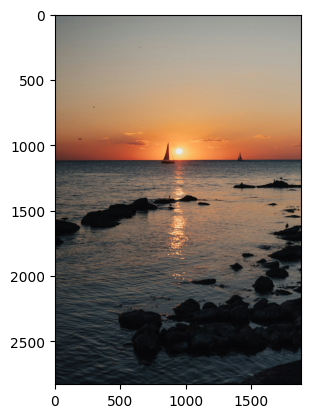

In [ ]:
plt.imshow(img)

#### a) Biểu diễn ảnh số

##### 1. Ảnh Grayscale và RGB:

- Ảnh xám (Grayscale):
    + Ma trận 2D
    + Mỗi phần tử là một điểm ảnh,
    + Từ 0 (đen) -> 255 (trắng)

- Ảnh màu (RGB):
    + Ma trận 3D
    + Mỗi vector gồm 3 giá trị (R,G,B)

Text(0.5, 1.0, 'GrayScale Image')

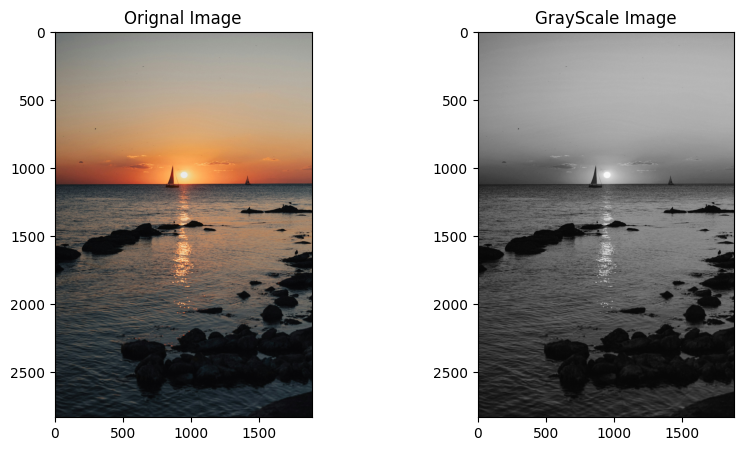

In [ ]:
# Convert to GrayScale Image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Show image
fig, axs = plt.subplots(1,2, figsize=(10,5)) #1 row, 2 cols

axs[0].imshow(img)
axs[0].set_title('Orignal Image')
axs[1].imshow(gray_img, cmap='gray')
axs[1].set_title('GrayScale Image')

##### 2. Độ phân giải và độ sâu bit

- Độ phân giải:
    + Đo bằng số lưởng điểm ảnh (pixels) theo chiều dài và chiều rộng. Ví dụ: 1920x1080 có 1920 theo ngang và 1080 theo dọc

- Độ sâu bit:
    + Số bit được sử dụng để biểu diễn màu sắc của mỗi pixel.
    + Ảnh 8-bit: 0->255 (256 mức độ màu)
    + Ảnh 16-bit: 0 -> 65535 (65536 mức độ màu)


In [ ]:
height, width, channels = img.shape
print(f"Độ phân giải: {height}x{width}")
print(f"Độ sâu bit: {img.dtype}") # RGB có channel là 3, còn gray có channel là 1

Độ phân giải: 2830x1887
Độ sâu bit: uint8


3. Các không gian màu khác

- RGB: Dựa trên Red, Green, Blue

- HSV: Hue, Saturation, Value. Hữu ích trong moi trường ánh sáng thay đổi, bời vì khi đó Value thay đổi còn Hue và Saturation vẫn giữ nguyên.

- LAB: Thiết kế gần giống nhất với cảm nhạn của mắt người.

- YCrCB: phổ biến trong video và truyền hình. Phù hợp trong xử lý video và phát hiện da trong hệ thống nhận dạng.

Text(0.5, 1.0, 'YCrCb Image')

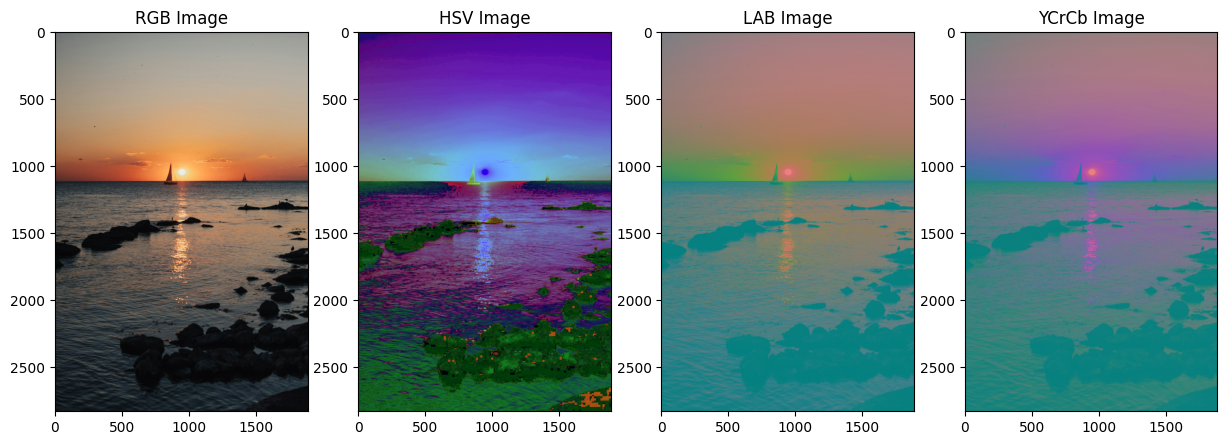

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(15,10))
axs[0].imshow(img)
axs[0].set_title('RGB Image')
axs[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
axs[1].set_title('HSV Image')
axs[2].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))
axs[2].set_title('LAB Image')
axs[3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb))
axs[3].set_title('YCrCb Image')

#### b) Tiền sử lý ảnh

##### 1. Chuẩn hoá (Normalization)

- Dùng để đưa ảnh về phạm vi tiêu chuẩn, đồng thời đồng nhất hoá các ảnh đầu vào.

- Phạm vi [0,1] hoặc [-1,1]

Công thức: pixel = (pixel/255)x2 -1

Text(0.5, 1.0, 'Normalized to [-1,1]')

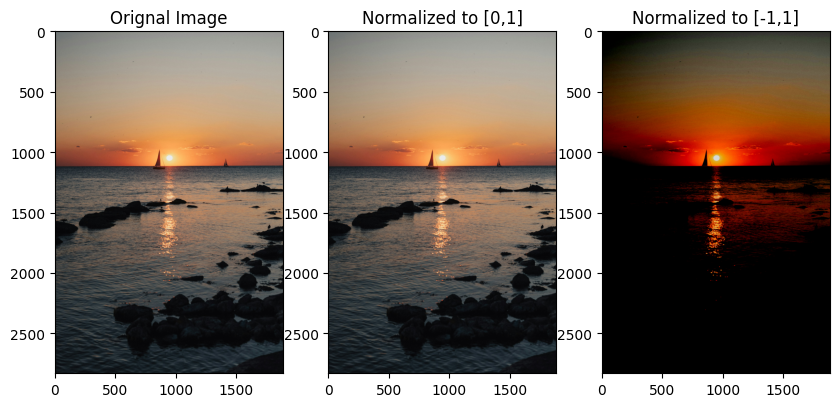

In [ ]:
# Chuẩn hoá vào [0,1]
img_normolized01 = img/255.0

# Normalize to [-1,1]
img_normolized11 = (img/255.0)*2 - 1

fig, axs = plt.subplots(1,3, figsize=(10,5)) #1 row, 2 cols
axs[0].imshow(img) # original
axs[0].set_title('Orignal Image')
axs[1].imshow(img_normolized01) # normalized to [0,1]
axs[1].set_title('Normalized to [0,1]')
axs[2].imshow(img_normolized11) # normalized to [-1,1]
axs[2].set_title('Normalized to [-1,1]')

##### 2. Hiệu chỉnh gamma

- Là quá trình điều chỉnh độ sáng phi tuyến của ảnh, giúp tăng cường hoặc giảm bớt độ sáng mà không đổi chi tiết màu sắc

- Hữu ích với cường độ ánh sáng thấp hoặc quá sáng, giúp cải thiện chi tiết ảnh mà không làm mất các vùng sáng tối quan trọng.

Text(0.5, 1.0, 'Gamma 2.2')

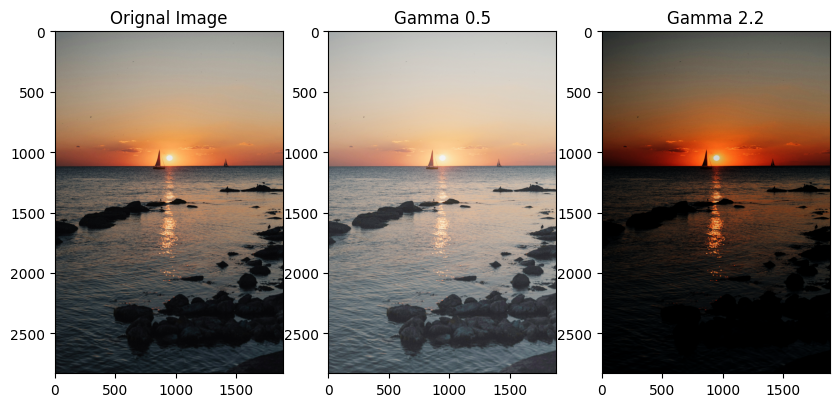

In [ ]:
# Gramma
def adjust_gramma(image, gamma=1.0):
  # Convert to float32
  image = np.array(image, dtype=np.float32) / 255.0

  # Apply Gamma Adjust
  image = np.power(image, gamma)

  # Convert back to [0,255]
  return np.uint(image * 255.0)

img_gamma05 = adjust_gramma(img, gamma=0.5)
img_gamma22 = adjust_gramma(img, gamma=2.2)

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(img) # original
axs[0].set_title('Orignal Image')
axs[1].imshow(img_gamma05) # normalized to [0,1]
axs[1].set_title('Gamma 0.5')
axs[2].imshow(img_gamma22) # normalized to [-1,1]
axs[2].set_title('Gamma 2.2')

##### 3. Cân bằng Histogram

- Tăng độ tương phản bằng cách phân phối lại các giá trị histogram.
- Làm nổi bật các chi tiết trong ảnh.
- Hữu ích cho vùng sáng/tối tối không đều.

Text(0.5, 1.0, 'Difference')

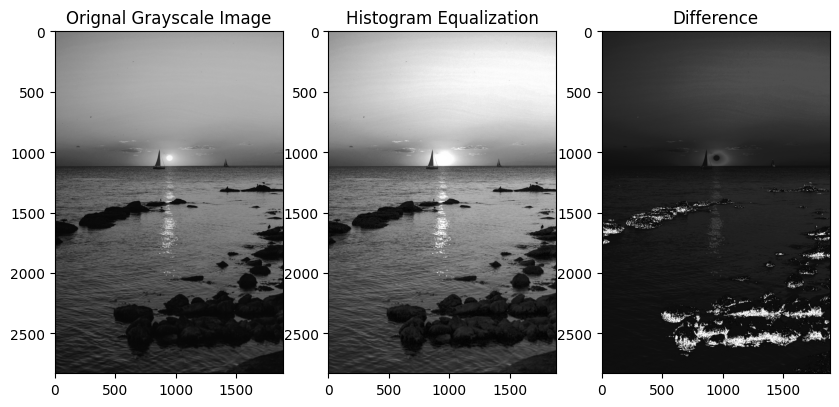

In [ ]:
# Historgam Equalization
img_hist_eq = cv2.equalizeHist(gray_img)

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(gray_img, cmap='gray') # original
axs[0].set_title('Orignal Grayscale Image')
axs[1].imshow(img_hist_eq, cmap='gray') # normalized to [0,1]
axs[1].set_title('Histogram Equalization')
axs[2].imshow(img_hist_eq - gray_img, cmap='gray') # difference
axs[2].set_title('Difference')

**Cân bằng Histogram thích ứng (CLAHE):**

- Chia thành các vùng nhỏ, xử lý từng vùng
- Giảm mất cân bằng quá mức.

Text(0.5, 1.0, 'Difference')

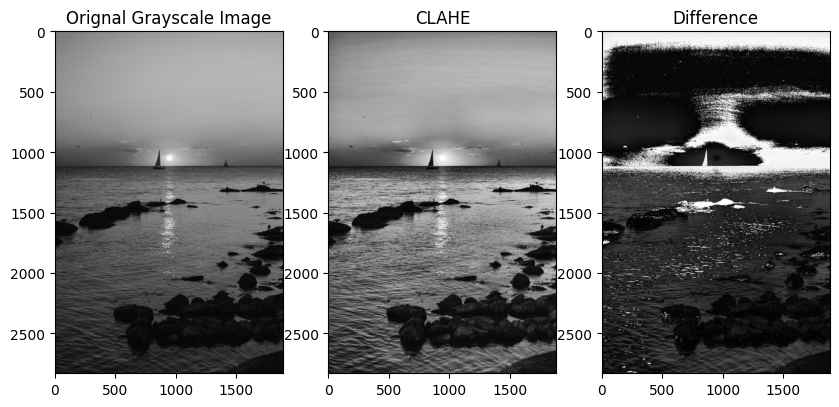

In [ ]:
# Intialize CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Apply CLAHE
img_clahe = clahe.apply(gray_img)

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(gray_img, cmap='gray') # original
axs[0].set_title('Orignal Grayscale Image')
axs[1].imshow(img_clahe, cmap='gray') # normalized to [0,1]
axs[1].set_title('CLAHE')
axs[2].imshow(img_clahe - gray_img, cmap='gray') # difference
axs[2].set_title('Difference')

##### 4. Giảm nhiễu (Denoise)

a) Medium Filtering (Lọc trung vị)

- Đơn giản và hiệu quả
- Hiểu quả với slat-and-pepper noise.
- Operations:
    1. Chọn cửa sổ: 3x3, 5x5, ect.
    2. Sắp xếo giá trị pixel theo tăng dần
    3. tìm medium
    4. thay thế giá trị pĩel bằng medium

Text(0.5, 1.0, 'Filtered Image 5x5')

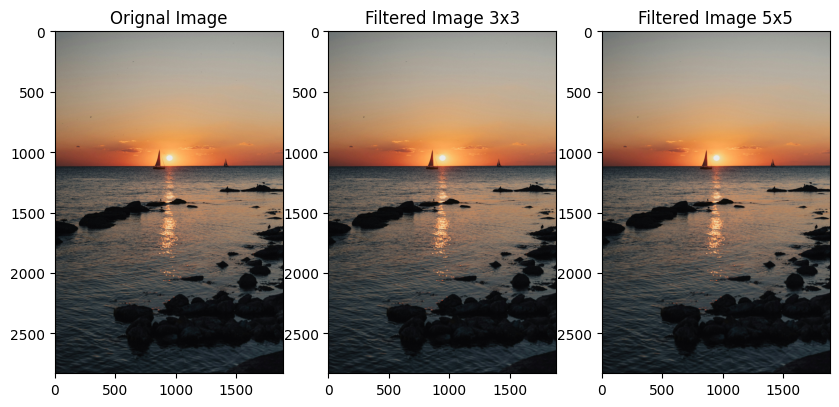

In [ ]:
filtered_image3 = cv2.medianBlur(img, ksize=3) #3x3
filtered_image5 = cv2.medianBlur(img, ksize=5) #5x5

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(img)
axs[0].set_title('Orignal Image')
axs[1].imshow(filtered_image3)
axs[1].set_title('Filtered Image 3x3')
axs[2].imshow(filtered_image5)
axs[2].set_title('Filtered Image 5x5')

b) Gaussian Filtering
- nhiễu Gaussian là nhiễu ngẫu nhiên có phân phối xác xuất
- giúp ảnh mượt hơn
- operation:
    1. Chọn cửa sổ
    2. chọn trọng số theo phân phối Gaussian (pixel ở gần pixel hiện tại có trọng số lớn hơn pixel ở xa)
    3. thay thế pixel


Text(0.5, 1.0, 'Filtered Image')

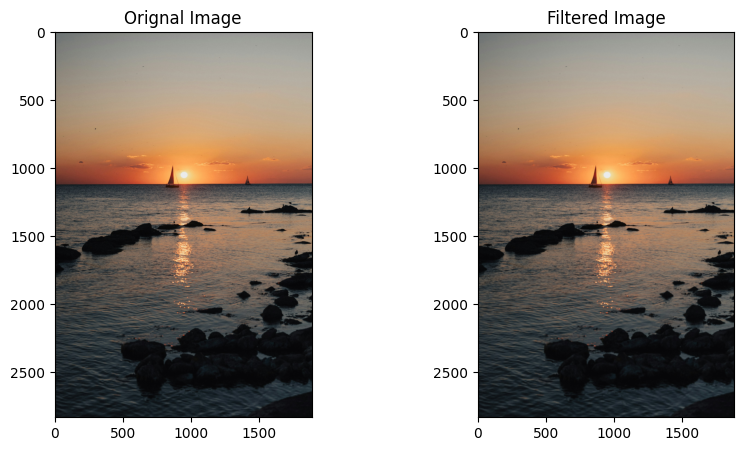

In [ ]:
filtered_image = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=0, sigmaY=0) # 5x5, độ lệch chuẩn là 0, 0
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(img)
axs[0].set_title('Orignal Image')
axs[1].imshow(filtered_image)
axs[1].set_title('Filtered Image')

c) Lọc song phương (Bilateral Filtering)
- Giữ cạnh sắc nét trong khi loại bỏ nhiễu
- Kết hợp cả yếu tố không gian và màu sắc

Text(0.5, 1.0, 'Filtered Image')

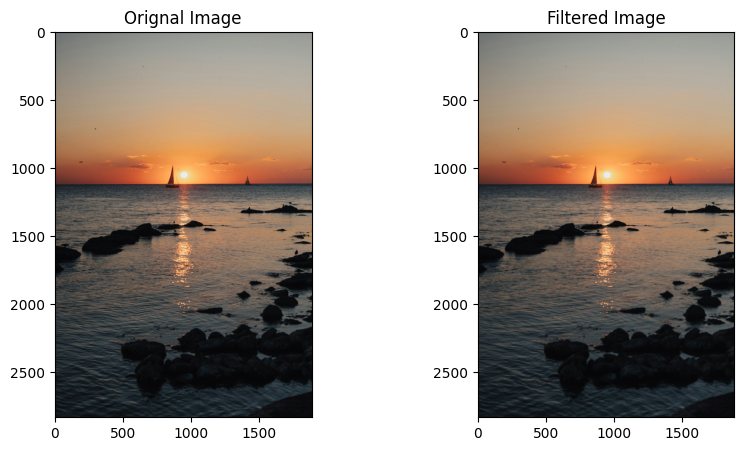

In [ ]:
filtered_image = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(img)
axs[0].set_title('Orignal Image')
axs[1].imshow(filtered_image)
axs[1].set_title('Filtered Image')

d) Non-local Means Filtering
- Không làm mất đi chi tiết ảnh:

Text(0.5, 1.0, 'Filtered Image')

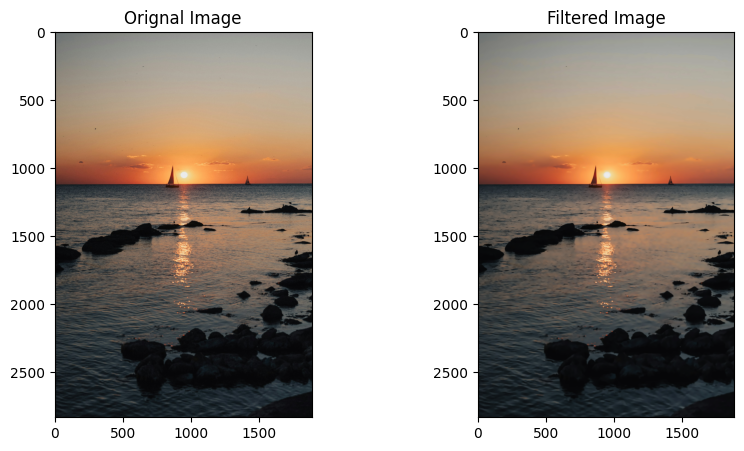

In [ ]:
image_nlmeans = cv2.fastNlMeansDenoisingColored(img, h=10, templateWindowSize=7, searchWindowSize=21)

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(img)
axs[0].set_title('Orignal Image')
axs[1].imshow(image_nlmeans)
axs[1].set_title('Filtered Image')

***Tóm tắt các phương pháp giảm nhiễu:***
- Lọc trung vị: Tốt cho nhiễu muối tiêu (salt-and-pepper).
- Lọc Gaussian: Hiệu quả với nhiễu Gaussian ngẫu nhiên.
- Lọc song phương: Giữ cạnh sắc nét trong khi loại bỏ nhiễu.
- Non-local Means: Giảm nhiễu hiệu quả mà không làm mất chi tiết ảnh.

#### c) Phát hiện cạnh và đường viền

- Sobel và Scharr đơn giản và nhanh chóng, nhưng ít chính xác trong trường hợp nhiễu.
- Laplacian phát hiện cạnh tốt, nhưng dễ gây nhiễu.
- Canny cho kết quả chính xác, nhưng phức tạp.
Biến đổi Hough hiệu quả với hình học cụ thể (đường thẳng, đường tròn).
- Watershed mạnh mẽ cho phân đoạn, nhưng dễ gặp vấn đề với nhiễu.

###### 1. Sobel and Scharr

 - Sobel là một kỹ thuật phổ biến dùng để tính gradient ảnh trong hai hướng x và y.

 - Tính sự thay đổi cường độ của ảnh threo hai hướng giúp phát hiện cạnh.

Text(0.5, 1.0, 'Sobel')

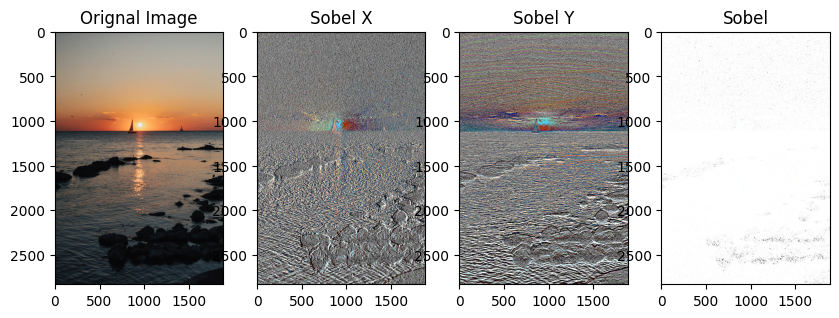

In [ ]:
sobel_x = cv2.Sobel(img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
sobel_y = cv2.Sobel(img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)

fig, axs = plt.subplots(1,4, figsize=(10,5))
axs[0].imshow(img)
axs[0].set_title('Orignal Image')
axs[1].imshow(sobel_x, cmap='gray')
axs[1].set_title('Sobel X')
axs[2].imshow(sobel_y, cmap='gray')
axs[2].set_title('Sobel Y')
axs[3].imshow(sobel, cmap='gray')
axs[3].set_title('Sobel')

- Scharr là một biến thể của Sobel, có bôk lọc mạnh hơn, hữu ích cho ảnh có độ nhiễu cao

###### 2. Laplacian

- Hữu ích trọg ảnh cso cường độ thay đổi nhanh chóng

Text(0.5, 1.0, 'Laplacian')

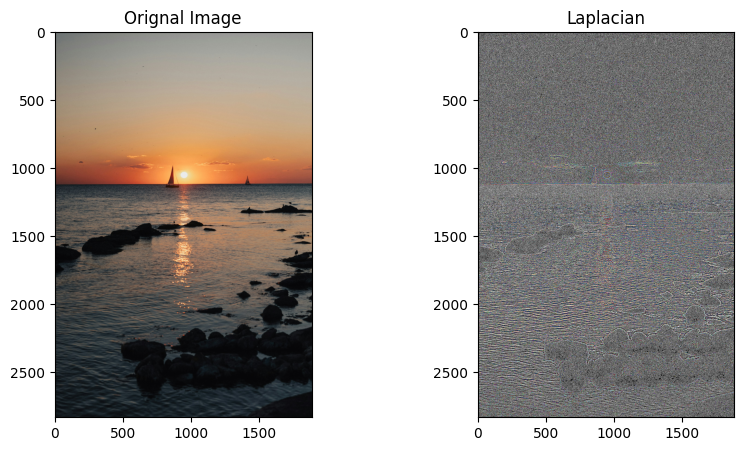

In [ ]:
laplacian = cv2.Laplacian(img, ddepth=cv2.CV_64F)

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(img)
axs[0].set_title('Orignal Image')
axs[1].imshow(laplacian, cmap='gray')
axs[1].set_title('Laplacian')

###### 3.Thuật toán Canny:

Thuật toán Canny là một quy trình phát hiện cạnh toàn diện, giúp phát hiện cạnh một cách chính xác và hiệu quả. Quy trình này gồm bốn bước chính:
- Làm mịn Gaussian: Dùng bộ lọc Gaussian để làm mịn ảnh, loại bỏ nhiễu trước khi tính toán gradient. Điều này giúp giảm thiểu sự ảnh hưởng của nhiễu và cải thiện độ chính xác khi phát hiện cạnh.
- Tính gradient: Tính toán gradient ảnh để xác định sự thay đổi mạnh về cường độ (cạnh). Canny sử dụng toán tử Sobel hoặc Scharr để tính toán gradient theo các hướng x và y.
- Loại bỏ không cực đại: Sau khi tính toán gradient, thuật toán sẽ loại bỏ các điểm không cực đại, tức là chỉ giữ lại các điểm có giá trị gradient cực đại trên từng hướng.
- Ngưỡng trễ: Cuối cùng, thuật toán sử dụng hai ngưỡng trễ (low và high) để xác định các cạnh mạnh và yếu. Các cạnh mạnh được giữ lại, trong khi các cạnh yếu bị loại bỏ nếu không liên kết với các cạnh mạnh.

Text(0.5, 1.0, 'Canny')

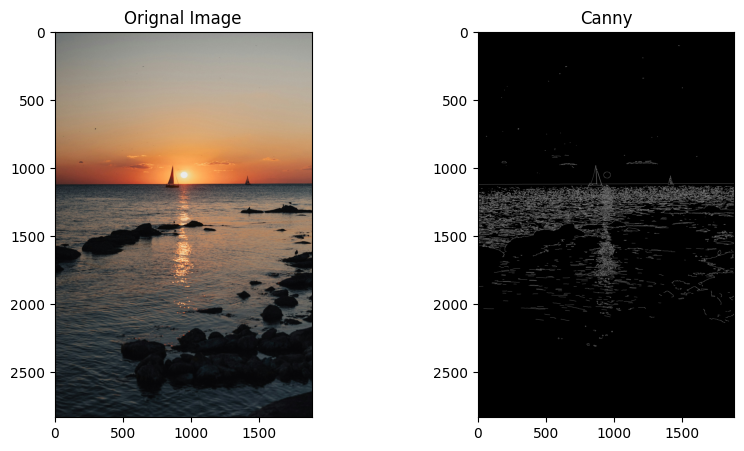

In [ ]:
edges_canny = cv2.Canny(img, 100, 200)

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(img)
axs[0].set_title('Orignal Image')
axs[1].imshow(edges_canny, cmap='gray')
axs[1].set_title('Canny')

###### 4. Phát hiện đường thẳng và hình dạng:

- Biến đổi Hough là một kỹ thuật mạnh mẽ để phát hiện các hình dạng như đường thẳng, đường tròn trong ảnh.

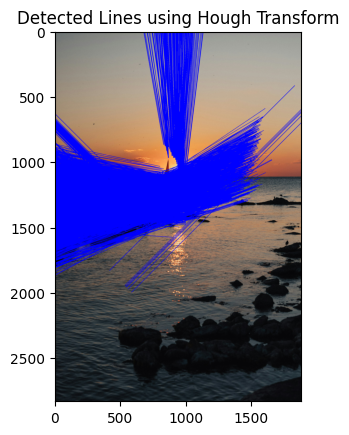

In [ ]:
# Hough Transform for Line Detection
lines = cv2.HoughLines(edges_canny, 1, np.pi / 180, 200)  # Adjust the threshold as needed

if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(img)
plt.title("Detected Lines using Hough Transform")
plt.show()

###### 5.Phân đoạn Watershed

- Phân đoạn Watershed là một kỹ thuật phân vùng ảnh thành các vùng đồng nhất dựa trên nguyên lý mô phỏng quá trình nước chảy. Kỹ thuật này chia ảnh thành các khu vực (vùng đất) mà các dòng chảy không thể vượt qua, tương tự như các bể nước trong địa lý. Phương pháp này thường được sử dụng để phân đoạn các đối tượng trong ảnh có biên độ sắc nét.

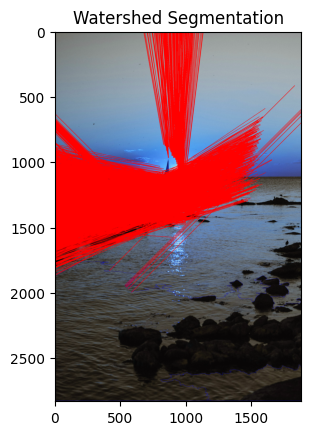

In [ ]:

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological opening
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply watershed algorithm
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.show()


#### d)  Biến đổi hình học

##### Phép tịnh tiến (Translation)

Phép tịnh tiến: Dịch chuyển đối tượng trong không gian mà không thay đổi kích thước hay hình dạng.

Text(0.5, 1.0, 'Translated Image')

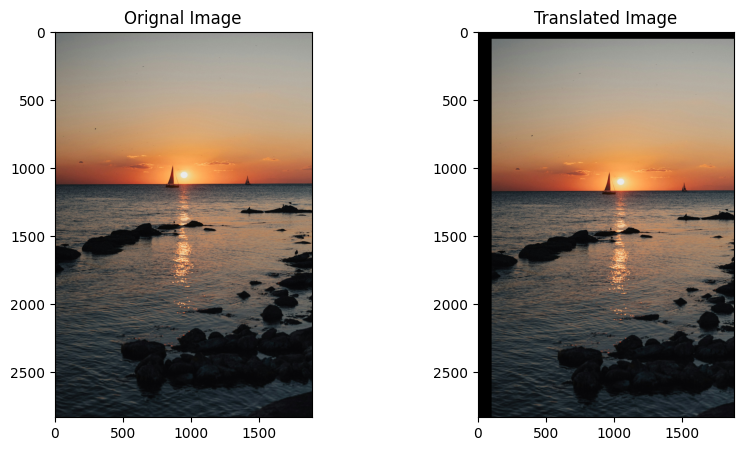

In [ ]:
url = 'https://images.unsplash.com/photo-1731328667980-9ea08c5edc07?q=80&w=1887&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'
response = requests.get(url)
img = np.array(Image.open(BytesIO(response.content)))

M_translate = np.float32([[1, 0, 100], [0, 1, 50]])  # Tịnh tiến 100 pixel theo chiều ngang, 50 pixel theo chiều dọc
img_translated = cv2.warpAffine(img, M_translate, (img.shape[1], img.shape[0]))


fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(img)
axs[0].set_title('Orignal Image')
axs[1].imshow(img_translated)
axs[1].set_title('Translated Image')

##### Phép xoay (Rotation)

Phép xoay: Xoay đối tượng quanh một điểm cố định theo một góc xác định.

Text(0.5, 1.0, 'Rotated Image')

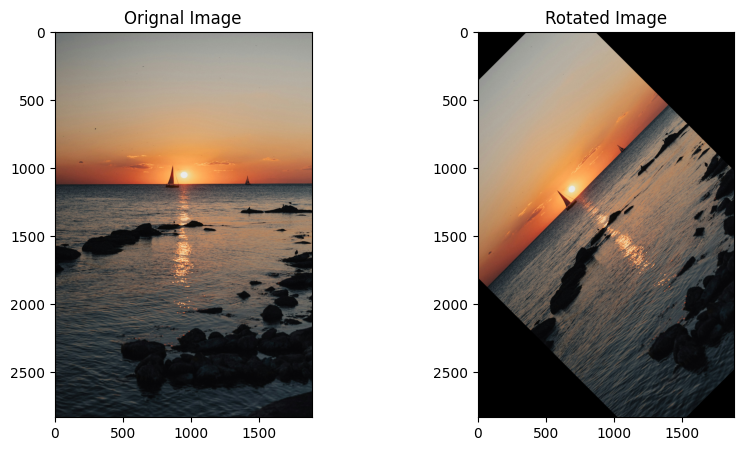

In [ ]:
rows, cols, _ = img.shape
M_rotate = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)  # Xoay 45 độ quanh tâm
img_rotated = cv2.warpAffine(img, M_rotate, (cols, rows))

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(img)
axs[0].set_title('Orignal Image')
axs[1].imshow(img_rotated)
axs[1].set_title('Rotated Image')

##### Scaling

Phép tỷ lệ: Thay đổi kích thước đối tượng mà không thay đổi hình dạng.

Text(0.5, 1.0, 'Scaled Image')

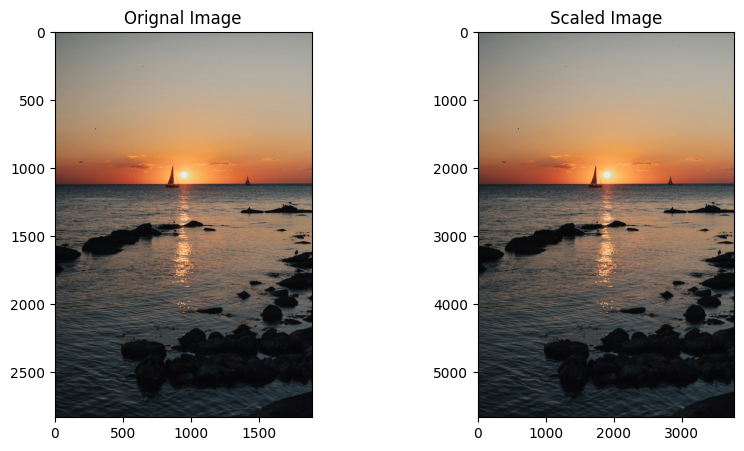

In [ ]:
M_scale = np.float32([[2, 0, 0], [0, 2, 0]])  # Tỷ lệ gấp đôi kích thước
img_scaled = cv2.warpAffine(img, M_scale, (cols * 2, rows * 2))

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(img)
axs[0].set_title('Orignal Image')
axs[1].imshow(img_scaled)
axs[1].set_title('Scaled Image')

##### Phép chiếu phối cảnh (Perspective Transformation)

Phép chiếu phối cảnh: Thay đổi góc nhìn của ảnh, tạo ra hiệu ứng phối cảnh 3D.

Text(0.5, 1.0, 'Affine Transformed Image')

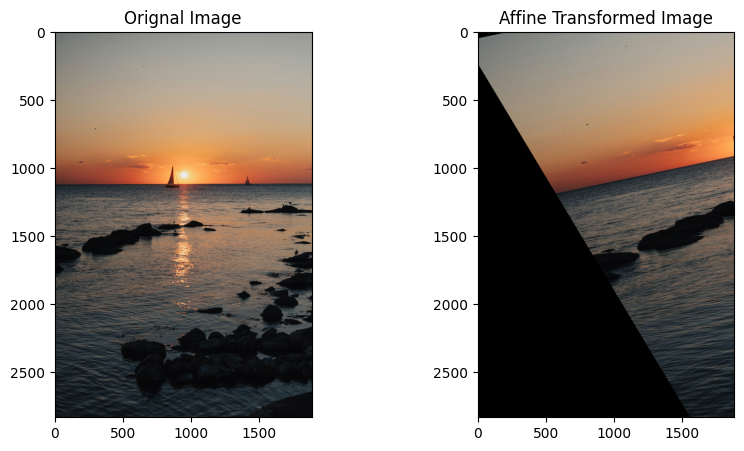

In [ ]:
# 4. Biến đổi affine (tịnh tiến, xoay và tỷ lệ kết hợp)
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])  # Ba điểm nguồn
pts2 = np.float32([[10, 100], [250, 50], [100, 250]])  # Ba điểm đích
M_affine = cv2.getAffineTransform(pts1, pts2)
img_affine = cv2.warpAffine(img, M_affine, (cols, rows))

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(img)
axs[0].set_title('Orignal Image')
axs[1].imshow(img_affine)
axs[1].set_title('Affine Transformed Image')

##### Biến đổi affine

Biến đổi affine: Bảo toàn các đường thẳng song song nhưng có thể thay đổi độ dài và góc của các đoạn thẳng.

##### Biến đổi affine bảo toàn đường thẳng song song

Biến đổi affine bảo toàn đường thẳng song song: Các đường thẳng song song trong ảnh trước khi biến đổi sẽ vẫn song song sau khi áp dụng phép biến đổi affine.

##### Biến đổi phối cảnh (homography)

Biến đổi phối cảnh (homography): Ánh xạ giữa các mặt phẳng, có thể được sử dụng để chuyển đổi góc nhìn trong xử lý ảnh.

### Chapter 1 Code

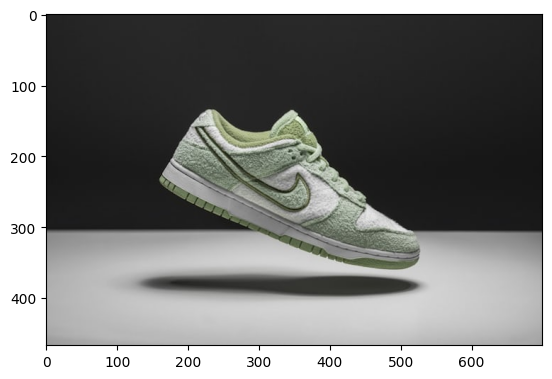

In [ ]:
url = 'https://images.unsplash.com/photo-1695753648663-72cc4dd99449?w=700&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1yZWxhdGVkfDExfHx8ZW58MHx8fHx8'
response = requests.get(url)
frame = np.array(Image.open(BytesIO(response.content)))
plt.imshow(frame)

Text(0.5, 1.0, 'Hue')

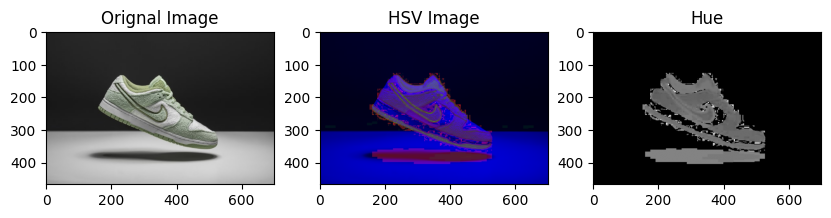

In [ ]:
# Convert to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(frame)
axs[0].set_title('Orignal Image')
axs[1].imshow(hsv)
axs[1].set_title('HSV Image')
axs[2].imshow(hsv[:,:,0], cmap='gray')
axs[2].set_title('Hue')

Text(0.5, 1.0, 'Hue')

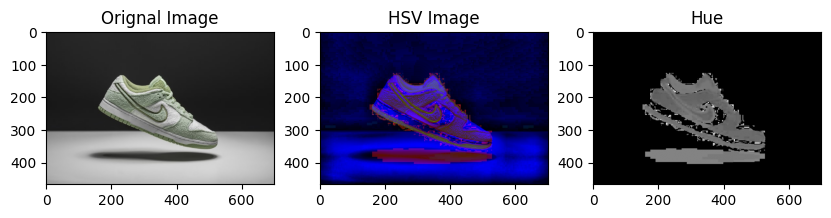

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# Split the HSV image into its three channels
hsv_planes = list(cv2.split(hsv))  # Convert tuple to list

# Apply CLAHE to the 'Value' channel (hsv_planes[2])
hsv_planes[2] = clahe.apply(hsv_planes[2])

# Merge the channels back into an HSV image
hsv = cv2.merge(hsv_planes)

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(frame)
axs[0].set_title('Orignal Image')
axs[1].imshow(hsv)
axs[1].set_title('HSV Image')
axs[2].imshow(hsv[:,:,0], cmap='gray')
axs[2].set_title('Hue')

Text(0.5, 1.0, 'Detected Products')

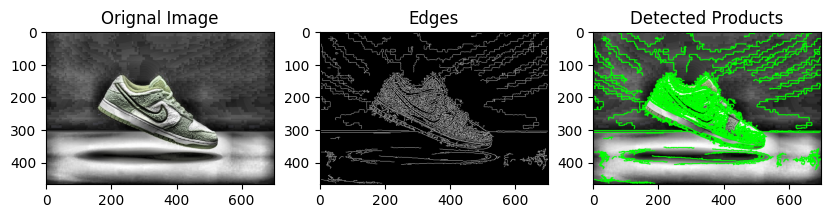

In [ ]:
# Chuyển lại sang BGR
normalized_frame = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Phát hiện cạnh bằng Canny
edges = cv2.Canny(cv2.cvtColor(normalized_frame, cv2.COLOR_BGR2GRAY), 50, 150)

# Tìm đường viền
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Vẽ các đường viền lên ảnh gốc (có thể là các sản phẩm)
result = normalized_frame.copy()
cv2.drawContours(result, contours, -1, (0, 255, 0), 2)

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(normalized_frame)
axs[0].set_title('Orignal Image')
axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Edges')
axs[2].imshow(result)
axs[2].set_title('Detected Products')


## 2. Trích xuất đặc trưng (Feature Extraction)

### Các khái niệm cần nắm vững:

#### a) Đặc trưng cạnh cục bộ:

##### 1. Histogram of Oriented Gradients (HOG)

**Nguyên lý**
- Mô tả hình dạng đối tượng trong ảnh dưới dạng phân bố gradient (đạo hàm)

- Chia ảnh thành cell ---trong mỗi cell---> tính histogram của các hướng gradient --> kết hợp với các ô liền kề để tạo ra đặt trưng ảnh.

**Ứng dụng**
- Bất biến với thay đổi ánh sáng
- Mạnh mẽ với biến dạng nhỏ

##### 2. Haar-like Features

**Nguyên lý**
- Dựa vào khác biệt cường độ sáng giữa các vùng chữ nhật
- Là một bộ các cửa sổ hình chữ nhật, nơi mà sự khác biệt vùng sáng tối có thể chỉ ra sự hiện diện của đối tượng.

VD: sự sáng tối giữa mắt mũi miệng -> có thể nhận diện khuôn mặt.

**Ưu điểm**
- Tính toán nhanh
- Hiệu quả trong nhận diện khuôn mặt

##### 3. Local Binary Patterns (LBP)


**Nguyên lý**
- Mô tả kết cấu bề mặt dựa trên so sánh pixel ở một cửa sổ với pixel trung tâm (lớn hơn -> 1, nhỏ -> 0).
- Sau khi có dãy nhị phân ---chuyển thành---> thập phân để tạo đặt trưng.

**Ứng dụng**
- Nhận diện kết cấu
- Phân loại vật liệu

**Ưu điểm**
- Hiệu quả tron nhận dạng kết cấu
- Chịu biến dạng nhỏ

#### b) Đặc trưng keypoint:

##### 1.Scale-Invariant Feature Transform (SIFT)

**Đặt điểm**
- Bất biến với tỷ lệ, xoay, thay đổi ánh sáng và góc nhìn

**Cách hoạt động**
- Sử dụng DoG (Difference of Gaussian) để xác định keypoint
- áp dụng descpritor (vetor miêu tả) cho mỗi keypoint, để xây dưngj gradient hướng.

**Ưu điểm**
- Độ chính xác cao.
- Phù hợp nhận dạng đối tượng và stitching ảnh

##### 2. Speeded-Up Robust Features (SURF)

**Đặc điểm**

- Phiên bản nhanh hơn của SIFT

**Hoạt động**
- Sử dụng xấp xỉ Hessian matrix (một công cụ toán học để tính độ cong của ảnh) để thay thế cho DoG.
- Ảnh tích phân (Integral images)

**Ưu điểm**
- Nhanh hơn, duy trì chính xác tương đối

##### 3. ORB (Oriented FAST and Rotated BRIEF)

**Đặt điểm**
- Kết hợp FAST keypoints và mô tả BRIEF với các cải tiến: ORB là sự kết hợp giữa FAST (Features from Accelerated Segment Test) để phát hiện các điểm đặc trưng và BRIEF (Binary Robust Independent Elementary Features) để mô tả các điểm đó. ORB cải tiến BRIEF bằng cách xoay mô tả để làm cho nó bất biến với việc xoay của ảnh.

**Ưu điểm**
- HIệu suất cao, mã nguồn mở

**Ứng dụng**
- Tracking the